In [7]:
#Importing the required modules for building and training neural networks, handling datasets, calculating metrics, and visualization.
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import tqdm
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
# Download the EuroSAT_RGB dataset and create data loaders
data_dir = 'C:/Users/krish/Downloads/STA380-master/data/EuroSAT_RGB'

transform = transforms.Compose([
                                transforms.Resize((128, 128)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Create an ImageFolder dataset
dataset = ImageFolder(data_dir, transform = transform)

# Split the dataset into 80/20 train and test sets
train_ratio = 0.8  # You can adjust the train-test split ratio
train_size = int(train_ratio * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 64, shuffle = False)

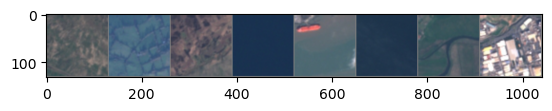

Sample Labels: HerbaceousVegetation Pasture HerbaceousVegetation SeaLake SeaLake SeaLake River Industrial AnnualCrop HerbaceousVegetation Forest Industrial SeaLake Industrial PermanentCrop Highway Highway SeaLake River HerbaceousVegetation Residential SeaLake Pasture River Residential Industrial River Residential PermanentCrop Industrial Forest River Residential SeaLake Residential Residential PermanentCrop PermanentCrop Forest Industrial PermanentCrop River Industrial Residential HerbaceousVegetation PermanentCrop Pasture PermanentCrop Forest SeaLake River Forest Forest Highway AnnualCrop Highway Forest Highway Industrial Forest Forest HerbaceousVegetation Residential Highway


In [16]:
# Function to display a sample of images
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of training images and display them
dataiter = iter(train_loader)
images, labels = dataiter.__next__()

imshow(torchvision.utils.make_grid(images[:8]))
sample_labels = [dataset.classes[idx] for idx in labels]
print('Sample Labels:', ' '.join(sample_labels))

In [10]:
# Let's define a simple CNN to classify images

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, 1)  # in_channels, out_channels, kernel_size, stride
        self.conv2 = nn.Conv2d(64, 128, 3, 1)
        self.dropout1 = nn.Dropout(0.25)  # Each channel gets zeroed out independently on each forward call with probability p
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(492032, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=492032, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


We have decided to use the simple neural network with two convolutional layers, two dropout layers and two fully connected layers as discussed in class. However, we changed the output channels for each convolutional layers a few times to check the overall accuracy of the model. We got better accuracy for 64 and 128 output channels for convolutional layer 1 and convolutional layer 2 respectively. We observed that as we increase the number of output channels for each convolutional layer, the time taken to run the model increases.
We have used ReLU activation functions as they are computationally efficient and result in zero output for negative inputs.

In [11]:
# Set the device to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

We used cross entropy loss to measure the accuracy of the model because Cross-entropy loss directly corresponds to the negative log-likelihood of the true class under the predicted probability distribution. It encourages the model to assign high probabilities to the correct class and low probabilities to incorrect classes.

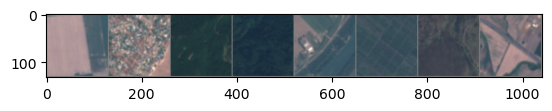

Predicted: Residential Residential River Residential Residential SeaLake Residential Residential


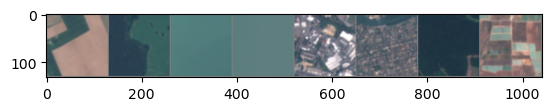

Predicted: AnnualCrop SeaLake SeaLake Pasture Industrial HerbaceousVegetation SeaLake AnnualCrop


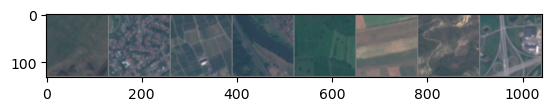

Predicted: Pasture HerbaceousVegetation Forest SeaLake SeaLake HerbaceousVegetation HerbaceousVegetation Industrial


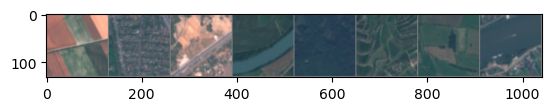

Predicted: PermanentCrop Residential PermanentCrop Highway Forest HerbaceousVegetation Highway River


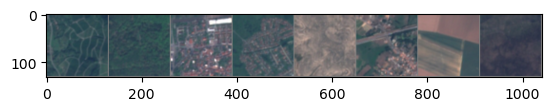

Predicted: Pasture River Residential HerbaceousVegetation PermanentCrop Residential AnnualCrop HerbaceousVegetation


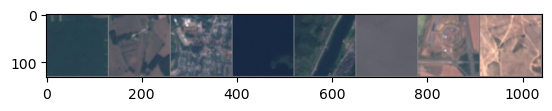

Predicted: Forest HerbaceousVegetation Residential SeaLake HerbaceousVegetation HerbaceousVegetation PermanentCrop PermanentCrop


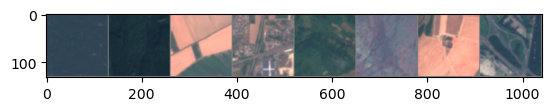

Predicted: SeaLake SeaLake AnnualCrop PermanentCrop River HerbaceousVegetation AnnualCrop River


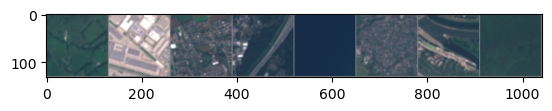

Predicted: Pasture Industrial Residential Highway SeaLake Residential Residential Pasture


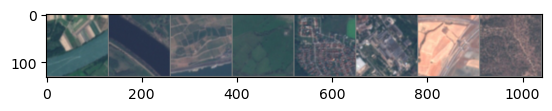

Predicted: Pasture River HerbaceousVegetation Pasture Residential Residential PermanentCrop HerbaceousVegetation


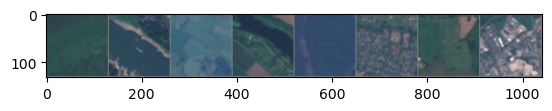

Predicted: Pasture River Pasture River River Residential Pasture Industrial


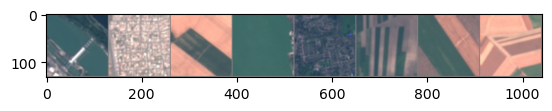

Predicted: Industrial Industrial AnnualCrop Pasture Residential Residential AnnualCrop AnnualCrop


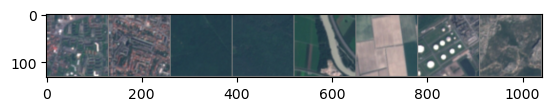

Predicted: Residential Residential Forest Forest Highway Highway Industrial Residential


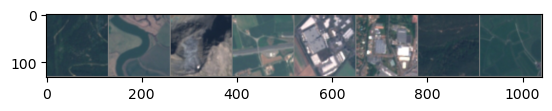

Predicted: Forest Highway HerbaceousVegetation Highway Industrial Industrial Forest Pasture


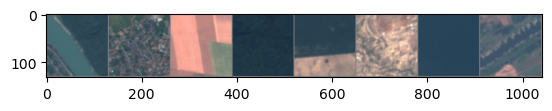

Predicted: River Residential AnnualCrop Forest River AnnualCrop Forest Highway


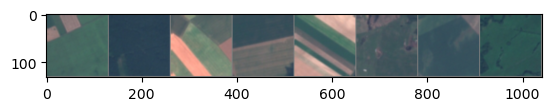

Predicted: Pasture Forest AnnualCrop PermanentCrop AnnualCrop PermanentCrop SeaLake Pasture


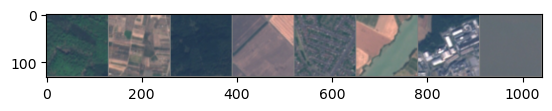

Predicted: Pasture PermanentCrop SeaLake AnnualCrop Residential AnnualCrop Industrial Residential


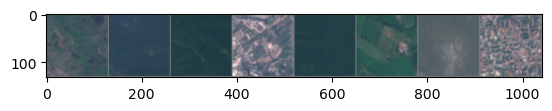

Predicted: Pasture SeaLake Forest River Forest SeaLake HerbaceousVegetation Residential
Epoch 1, Loss: 1.4434594885837397


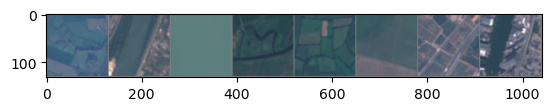

Predicted: Pasture Highway Forest Forest River Pasture Residential Highway


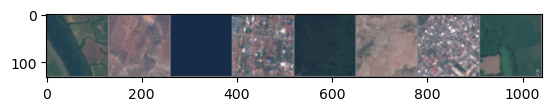

Predicted: Forest PermanentCrop SeaLake Residential Forest PermanentCrop Industrial AnnualCrop


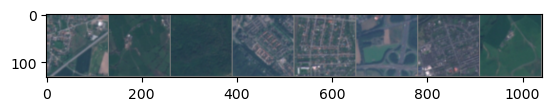

Predicted: River Forest Forest Residential Residential Highway Residential Forest


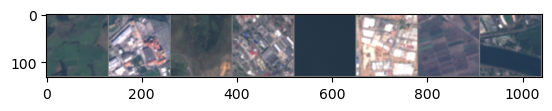

Predicted: Pasture Industrial HerbaceousVegetation Industrial Forest Industrial Residential River


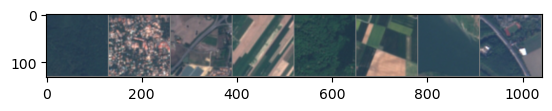

Predicted: Forest Residential HerbaceousVegetation River Forest River Forest Highway


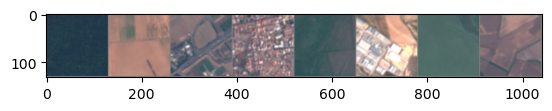

Predicted: Forest AnnualCrop Residential Residential Pasture Industrial SeaLake AnnualCrop


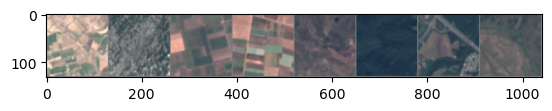

Predicted: PermanentCrop HerbaceousVegetation HerbaceousVegetation AnnualCrop HerbaceousVegetation Forest Highway HerbaceousVegetation


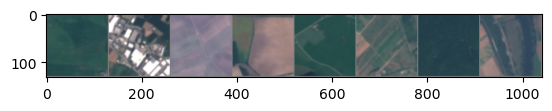

Predicted: Pasture Industrial HerbaceousVegetation AnnualCrop SeaLake AnnualCrop Forest AnnualCrop


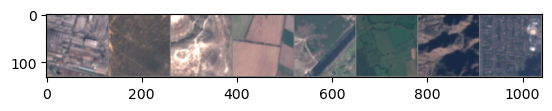

Predicted: Residential HerbaceousVegetation Industrial AnnualCrop Highway Pasture HerbaceousVegetation Residential


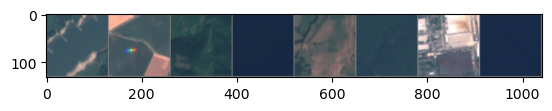

Predicted: PermanentCrop AnnualCrop Forest SeaLake HerbaceousVegetation Forest Industrial SeaLake


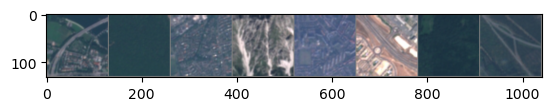

Predicted: Highway Forest Residential Highway Pasture Industrial Forest River


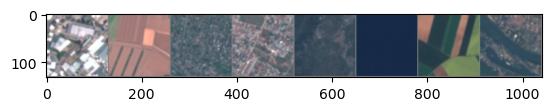

Predicted: Industrial PermanentCrop Residential Residential Residential SeaLake River Residential


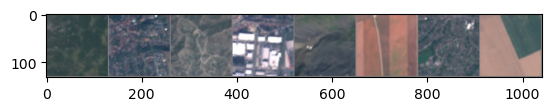

Predicted: HerbaceousVegetation Residential HerbaceousVegetation Industrial HerbaceousVegetation AnnualCrop Residential AnnualCrop


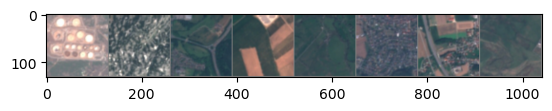

Predicted: Highway Residential Highway AnnualCrop Pasture Residential AnnualCrop Pasture


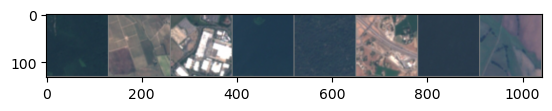

Predicted: Forest HerbaceousVegetation Industrial SeaLake SeaLake Highway SeaLake AnnualCrop


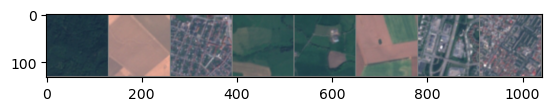

Predicted: Forest AnnualCrop Residential Pasture Pasture AnnualCrop Highway Residential


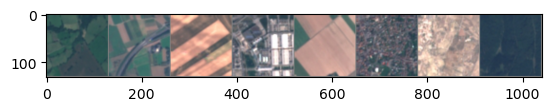

Predicted: Pasture PermanentCrop AnnualCrop Industrial AnnualCrop Residential PermanentCrop Forest
Epoch 2, Loss: 1.0101995482247257


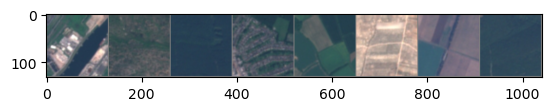

Predicted: River HerbaceousVegetation Forest Highway Forest PermanentCrop AnnualCrop Forest


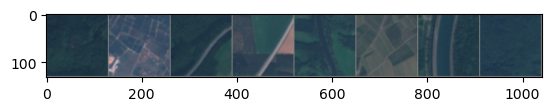

Predicted: Forest Residential River River Forest HerbaceousVegetation River Forest


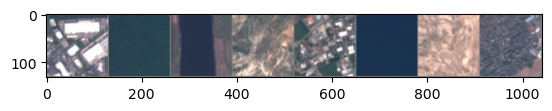

Predicted: Industrial Forest River HerbaceousVegetation Industrial SeaLake PermanentCrop Residential


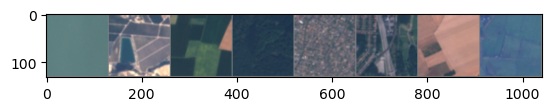

Predicted: SeaLake Industrial Pasture SeaLake Residential Highway AnnualCrop Pasture


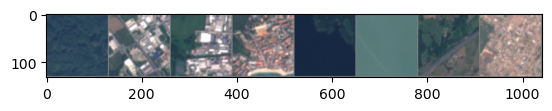

Predicted: Forest Industrial Industrial Residential SeaLake SeaLake Highway PermanentCrop


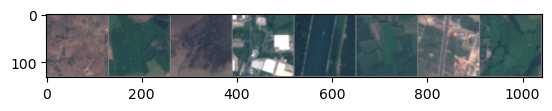

Predicted: PermanentCrop Pasture HerbaceousVegetation Industrial Highway Pasture Residential Pasture


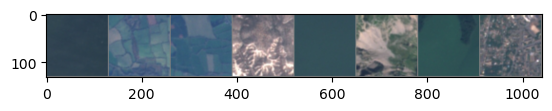

Predicted: Forest Pasture Forest Residential Forest PermanentCrop Forest Residential


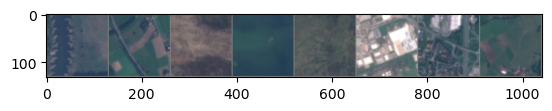

Predicted: River Highway HerbaceousVegetation Forest HerbaceousVegetation Industrial Highway Pasture


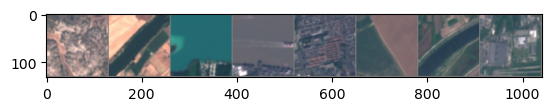

Predicted: Highway AnnualCrop Pasture HerbaceousVegetation Residential AnnualCrop River Highway


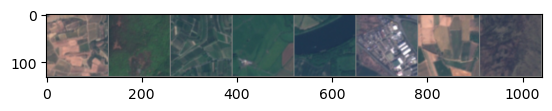

Predicted: PermanentCrop Pasture River Pasture River Industrial PermanentCrop HerbaceousVegetation


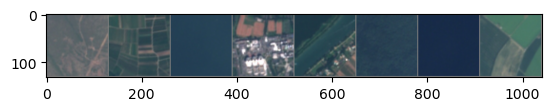

Predicted: HerbaceousVegetation Highway SeaLake Industrial River SeaLake SeaLake AnnualCrop


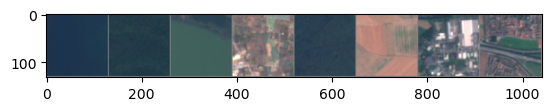

Predicted: SeaLake Forest Pasture PermanentCrop Forest AnnualCrop Industrial Residential


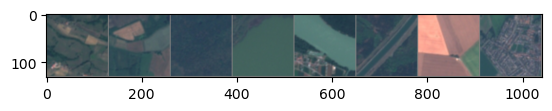

Predicted: HerbaceousVegetation Pasture Forest Forest River Highway AnnualCrop Residential


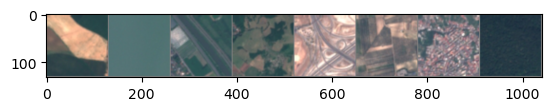

Predicted: AnnualCrop SeaLake PermanentCrop PermanentCrop Residential PermanentCrop Residential Forest


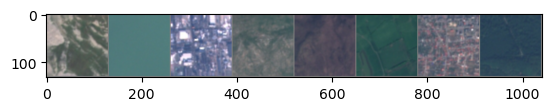

Predicted: PermanentCrop SeaLake River HerbaceousVegetation HerbaceousVegetation Pasture Residential Forest


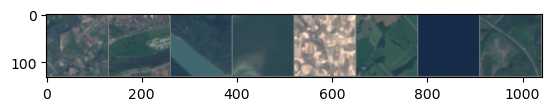

Predicted: PermanentCrop PermanentCrop Forest Forest PermanentCrop Pasture SeaLake HerbaceousVegetation


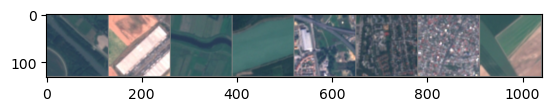

Predicted: River Industrial River Pasture Industrial Residential Industrial AnnualCrop
Epoch 3, Loss: 0.808734303924459


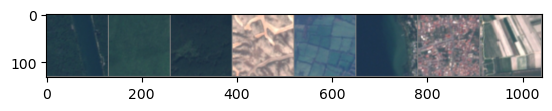

Predicted: Forest Forest Forest PermanentCrop Pasture SeaLake Residential Industrial


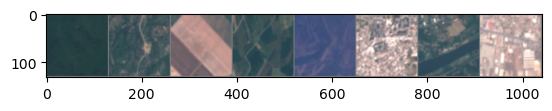

Predicted: Forest Highway AnnualCrop Highway HerbaceousVegetation Residential Highway Residential


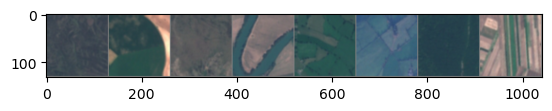

Predicted: HerbaceousVegetation AnnualCrop HerbaceousVegetation PermanentCrop Pasture Pasture Forest AnnualCrop


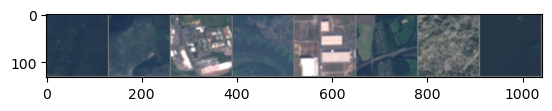

Predicted: Forest River Industrial River Industrial River Highway Forest


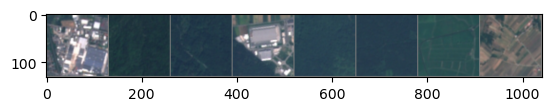

Predicted: Industrial Forest Forest Industrial Forest Forest Forest HerbaceousVegetation


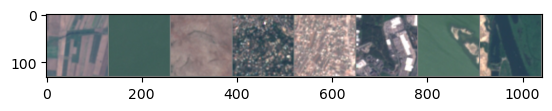

Predicted: AnnualCrop Forest AnnualCrop Residential Residential Industrial AnnualCrop River


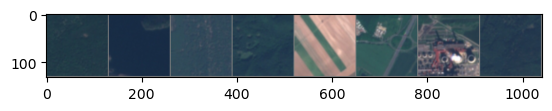

Predicted: Forest SeaLake Forest Forest AnnualCrop Highway Industrial Forest


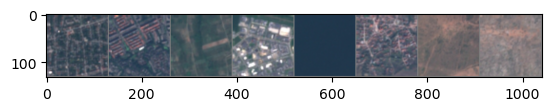

Predicted: Residential Residential PermanentCrop Industrial SeaLake Residential HerbaceousVegetation HerbaceousVegetation


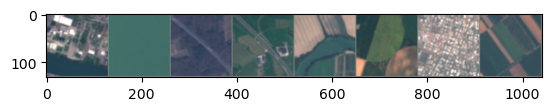

Predicted: River SeaLake River Highway AnnualCrop AnnualCrop Residential Highway


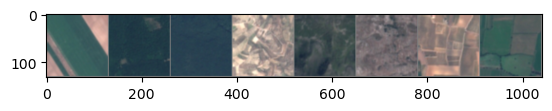

Predicted: AnnualCrop Forest Forest PermanentCrop HerbaceousVegetation HerbaceousVegetation PermanentCrop Pasture


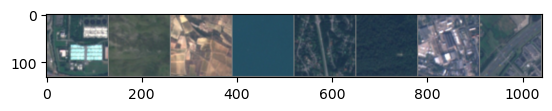

Predicted: Industrial HerbaceousVegetation PermanentCrop SeaLake Highway Forest Industrial River


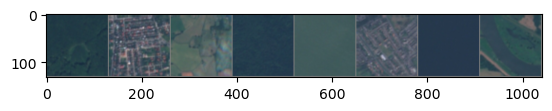

Predicted: Forest Residential AnnualCrop Forest SeaLake Residential Forest Pasture


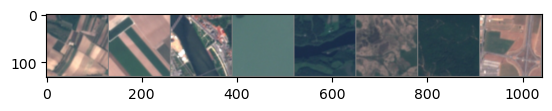

Predicted: PermanentCrop AnnualCrop River SeaLake Forest HerbaceousVegetation Forest PermanentCrop


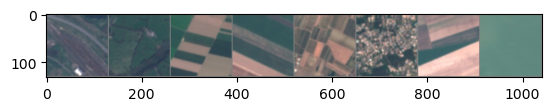

Predicted: HerbaceousVegetation Pasture AnnualCrop AnnualCrop PermanentCrop Residential AnnualCrop SeaLake


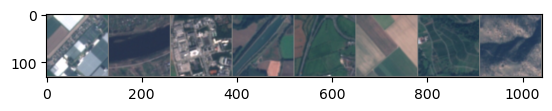

Predicted: Industrial River Industrial Highway River AnnualCrop River River


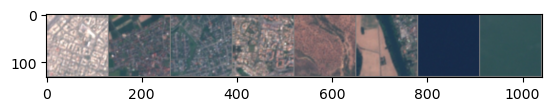

Predicted: Industrial Residential Residential Residential PermanentCrop River SeaLake Forest


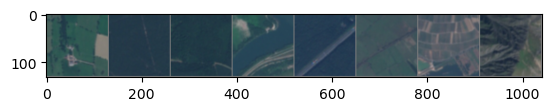

Predicted: River Forest Forest Highway Forest Pasture HerbaceousVegetation HerbaceousVegetation
Epoch 4, Loss: 0.7067582862969686


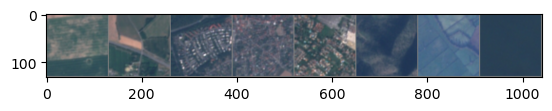

Predicted: River Highway Industrial Residential Residential HerbaceousVegetation Pasture SeaLake


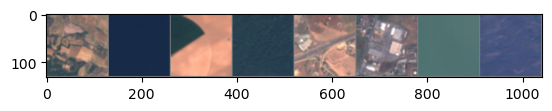

Predicted: PermanentCrop SeaLake AnnualCrop Forest PermanentCrop Industrial SeaLake HerbaceousVegetation


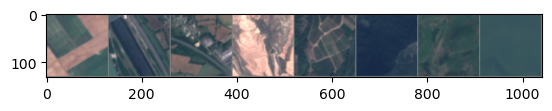

Predicted: AnnualCrop River Residential PermanentCrop PermanentCrop SeaLake AnnualCrop SeaLake


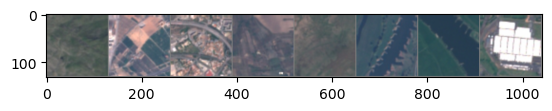

Predicted: HerbaceousVegetation Highway Residential HerbaceousVegetation HerbaceousVegetation River River Industrial


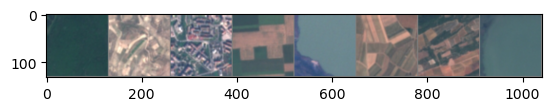

Predicted: Forest PermanentCrop Industrial AnnualCrop Pasture PermanentCrop HerbaceousVegetation SeaLake


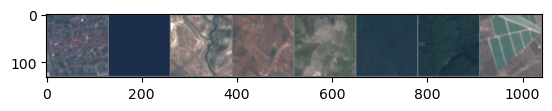

Predicted: Residential SeaLake HerbaceousVegetation PermanentCrop HerbaceousVegetation Forest Forest River


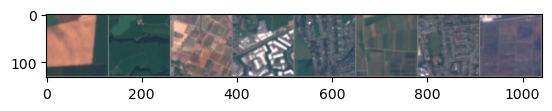

Predicted: AnnualCrop Forest PermanentCrop Industrial Residential Pasture Residential AnnualCrop


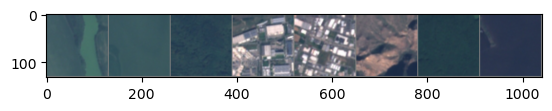

Predicted: SeaLake SeaLake Forest Industrial Industrial HerbaceousVegetation Forest SeaLake


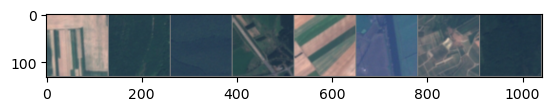

Predicted: AnnualCrop Forest HerbaceousVegetation Highway AnnualCrop Highway Residential SeaLake


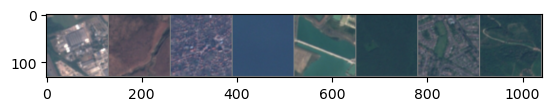

Predicted: Industrial HerbaceousVegetation Residential Forest Highway Forest Residential Pasture


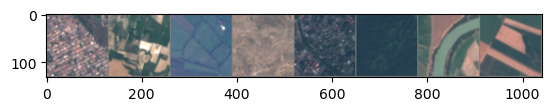

Predicted: Residential Highway Pasture HerbaceousVegetation Residential Forest AnnualCrop AnnualCrop


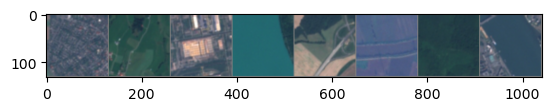

Predicted: Residential Pasture Highway SeaLake PermanentCrop Residential Forest River


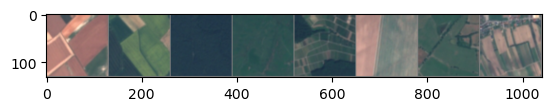

Predicted: AnnualCrop SeaLake Forest Forest Pasture AnnualCrop Pasture PermanentCrop


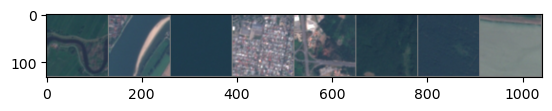

Predicted: Pasture River SeaLake Industrial Highway Forest Forest SeaLake


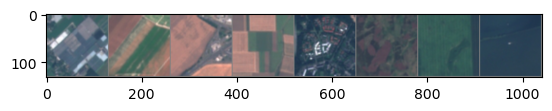

Predicted: Industrial AnnualCrop AnnualCrop AnnualCrop Industrial HerbaceousVegetation Pasture SeaLake


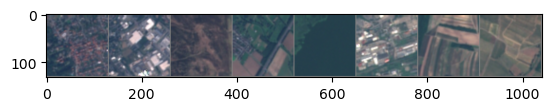

Predicted: Residential Industrial HerbaceousVegetation River Forest Industrial PermanentCrop PermanentCrop


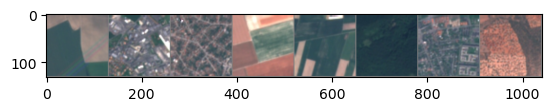

Predicted: AnnualCrop Industrial Residential AnnualCrop AnnualCrop Forest Residential PermanentCrop
Epoch 5, Loss: 0.6212645844947657
Finished Training


In [12]:
# Number of training epochs
num_epochs = 5

testiter = iter(test_loader)
# Main training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward, backward, and optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 20 == 0:
            with torch.no_grad():
                # Show a sample of images from the test data and model's predictions
                test_images, test_labels = testiter.__next__()
                test_images, test_labels = test_images.to(device), test_labels.to(device)

                imshow(torchvision.utils.make_grid(test_images[:8].cpu()))
                test_outputs = net(test_images[:8])
                _, predicted = torch.max(test_outputs, 1)
                # Map predicted indices to class labels
                predicted_labels = [dataset.classes[idx] for idx in predicted]
                
                print('Predicted:', ' '.join(predicted_labels))
                
    # Print average loss for the epoch
    print(f"Epoch {epoch+1}, Loss: {running_loss / (i+1)}")


print('Finished Training')

In [13]:
# Calculate accuracy score and confusion matrix after the training loop
net.eval()  # Set the model to evaluation mode

all_predictions = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        outputs = net(inputs)
        _, predicted_indices = torch.max(outputs, 1)
        
        all_predictions.extend(predicted_indices.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Convert predicted indices to class labels
predicted_labels_1 = [dataset.classes[idx] for idx in all_predictions]
true_labels = [dataset.classes[label] for label in all_labels]

# Calculate accuracy score
test_accuracy = accuracy_score(true_labels, predicted_labels_1)

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels_1, labels=dataset.classes)

# Print accuracy score
print(f"Test Accuracy: {test_accuracy:.2f}")

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Test Accuracy: 0.76
Confusion Matrix:
[[501   1  13  19   0  25  14   0   9  19]
 [  0 527  23   0   0  57   0   0   4  16]
 [ 18   0 470   6  12   8  43  21   5   1]
 [ 29   2  38 249  27  10  36  61  50   1]
 [  0   0   2   3 465   0   1  30   0   0]
 [  5   5  34   5   0 311   9   0   8   9]
 [ 32   0 139  20   9  14 287   8   8   0]
 [  0   0  15   2  23   1   0 538   1   0]
 [ 25  11  36  62  10  38   7  13 295   4]
 [  6  84  18   0   0  27   0   0   8 457]]


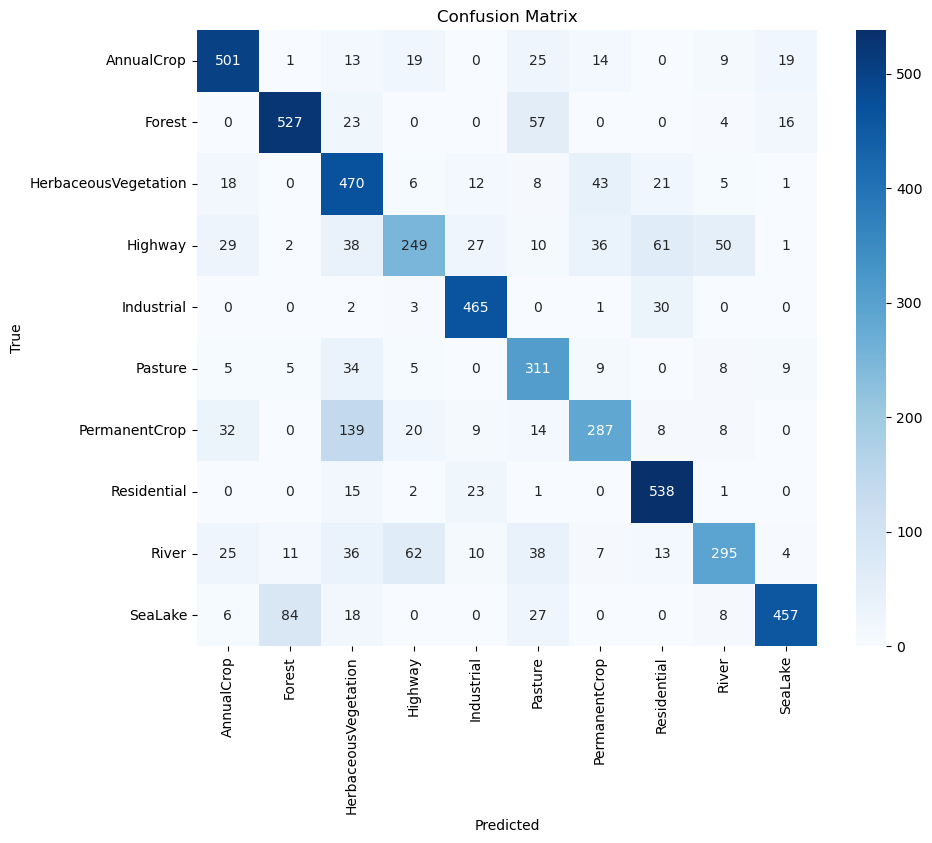

In [14]:
# Plot confusion matrix using seaborn and matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

The overall model accuracy is 76%. It can be inferred from the confusion matrix heatmap that the model was very good in predicting *Residential*, *Forrest* and *AnnualCrop* and poor in predicting *Highway*, *PermanentCrop* and *River*. 